In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
photo = cv2.imread('photo.jpg')
print('original photo :',photo.shape) #BGR
photo = cv2.resize(photo,(256,256))
print('resize photo :',photo.shape) #resize


original photo : (2594, 2695, 3)
resize photo : (256, 256, 3)


### Photo to RGB and show


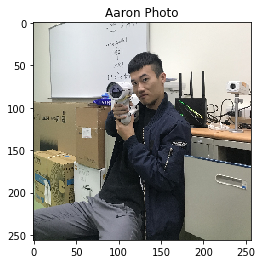

In [3]:
photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)

plt.title('Aaron Photo')
plt.imshow(photo)

### Load Tainan photos

In [61]:
factor_size = 10

import glob
cv_img = []
print('finish :',end='')
for img in glob.glob("Tainan/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n,(factor_size,factor_size))
    n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
    cv_img.append(n)
    if len(cv_img) %10 == 0:
        print(len(cv_img),end=' ')
print('\nTainan Photo length :',len(cv_img))

finish :10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 
Tainan Photo length : 256


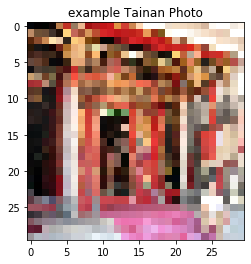

In [62]:
plt.title('example Tainan Photo')
plt.imshow(cv_img[4])

In [66]:
output = np.zeros((256*factor_size,256*factor_size,3),dtype=np.uint8)
alpha = 0.5
beta = ( 1.0 - alpha );

print('Loading : ',end='')

for i in range(256) :
    if i % 10 == 0 :
        print(i,end=' ')
    for j in range(256):
        r = int(photo[i][j][0])
        g = int(photo[i][j][1])
        b = int(photo[i][j][2])
        rec = cv_img[i].copy()
        cv_copy = cv_img[i].copy()
        cv2.rectangle(rec, (0,0),(factor_size,factor_size), (r, g, b), -1) # 寬度-1 = 實心
        cv2.addWeighted( rec, alpha ,cv_copy,beta , 0 , cv_copy)
        output[ i*factor_size:(i+1)*factor_size , j*factor_size:(j+1)*factor_size ] = cv_copy
print('Finish')

Loading : 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 Finish


Output Photo size :  (7680, 7680, 3)


True

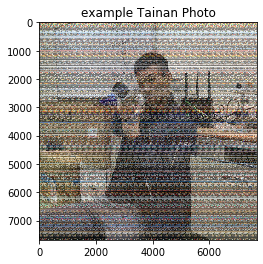

In [67]:
print('Output Photo size : ',output.shape)
plt.title('example Tainan Photo')
plt.imshow(output)

#RGB2GBR
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
cv2.imwrite('output.png', output)
